<h1>Универсальный шаблон (под любой регион РФ)<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Используемые-ресурсы" data-toc-modified-id="Используемые-ресурсы-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Используемые ресурсы</a></span></li><li><span><a href="#Формирование-базы-данных" data-toc-modified-id="Формирование-базы-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Формирование базы данных</a></span></li><li><span><a href="#Генерация-генеральной-совокупности" data-toc-modified-id="Генерация-генеральной-совокупности-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Генерация генеральной совокупности</a></span></li><li><span><a href="#Подготовка-обучающего-и-тестового-фрейма-и-оценка-ценности-признаков" data-toc-modified-id="Подготовка-обучающего-и-тестового-фрейма-и-оценка-ценности-признаков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовка обучающего и тестового фрейма и оценка ценности признаков</a></span></li><li><span><a href="#Классификация-деревьями" data-toc-modified-id="Классификация-деревьями-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Классификация деревьями</a></span></li><li><span><a href="#Классификация-бустингом" data-toc-modified-id="Классификация-бустингом-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Классификация бустингом</a></span><ul class="toc-item"><li><span><a href="#Scikit" data-toc-modified-id="Scikit-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Scikit</a></span></li><li><span><a href="#XGboost" data-toc-modified-id="XGboost-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>XGboost</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#AdaBoost" data-toc-modified-id="AdaBoost-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>AdaBoost</a></span></li></ul></li><li><span><a href="#Классификация-методом-опорных-векторов" data-toc-modified-id="Классификация-методом-опорных-векторов-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Классификация методом опорных векторов</a></span></li><li><span><a href="#Ансамбль-методов" data-toc-modified-id="Ансамбль-методов-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Ансамбль методов</a></span><ul class="toc-item"><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Bagging" data-toc-modified-id="Bagging-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Bagging</a></span><ul class="toc-item"><li><span><a href="#Bagging-(DecisionTreeClassifier)" data-toc-modified-id="Bagging-(DecisionTreeClassifier)-8.2.1"><span class="toc-item-num">8.2.1&nbsp;&nbsp;</span>Bagging (DecisionTreeClassifier)</a></span></li><li><span><a href="#Bagging-(Support-Vector-Method)" data-toc-modified-id="Bagging-(Support-Vector-Method)-8.2.2"><span class="toc-item-num">8.2.2&nbsp;&nbsp;</span>Bagging (Support Vector Method)</a></span><ul class="toc-item"><li><span><a href="#Дефолтные-гиперпараметры" data-toc-modified-id="Дефолтные-гиперпараметры-8.2.2.1"><span class="toc-item-num">8.2.2.1&nbsp;&nbsp;</span>Дефолтные гиперпараметры</a></span></li><li><span><a href="#Гиперпараметры-из-п.-5" data-toc-modified-id="Гиперпараметры-из-п.-5-8.2.2.2"><span class="toc-item-num">8.2.2.2&nbsp;&nbsp;</span>Гиперпараметры из п. 5</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Метод-K-ближайших-соседей" data-toc-modified-id="Метод-K-ближайших-соседей-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Метод K-ближайших соседей</a></span></li></ul></div>

**Исследуемый субъект**: (*для примера – Республика Татарстан*). Генеральная совокупность: 2013-2023 год, тестовая выборка: 2023 год

# Используемые ресурсы 

In [1]:
import os
import shutil
import requests
import datetime
import warnings
from bs4 import BeautifulSoup
from tqdm.notebook import trange

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform
from catboost import CatBoostClassifier
import xgboost as xgb

# Формирование базы данных

In [2]:
headers = {
    'Accept': '*/*',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36'
}


t = {'ё': 'yo', 'а': 'a', 'б': 'b', 'в': 'v', 'г': 'g', 'д': 'd', 'е': 'e', 'ж': 'zh',
     'з': 'z', 'и': 'i', 'й': 'y', 'к': 'k', 'л': 'l', 'м': 'm', 'н': 'n', 'о': 'o', 'п': 'p',
     'р': 'r', 'с': 's', 'т': 't', 'у': 'u', 'ф': 'f', 'х': 'h', 'ц': 'c', 'ч': 'ch', 'ш': 'sh',
     'щ': 'shch', 'ъ': '', 'ы': 'y', 'ь': '', 'э': 'e', 'ю': 'yu', 'я': 'ya'}
def translate(text: str, sep = '_'):
    tx = ''
    for i in text:
        if i == '"' or i == '|':
            tx += ''
        elif i != ' ':
            tx += t.get(i, i)
        else:
            tx += sep
    return tx

valid_data = {}
with open('index.html', 'r', encoding='utf-8') as file:
    src = file.read() 

soup = BeautifulSoup(src, 'lxml')

divs_anch = soup.find_all('div', class_="xml-data-row-links")
divs = soup.find_all('div', class_='header')

anch = [divs_anch[i].find_all('a') for i in range(len(divs))]


for i in range(len(divs)):
    for j in range(len(anch[i])):
        valid_data[divs[i].text + ' | ' + anch[i][j].text] = anch[i][j].get('href')[anch[i][j].get('href').find('_', 55)+1:anch[i][j].get('href').rfind('_')]

def get_data():
    key = input('\n'.join(valid_data.keys()) + '\n')
    tr_key = translate(key.lower())
    print(tr_key)
    if not os.path.exists(f'./{tr_key.capitalize()}'):
        os.mkdir(f'./{tr_key.capitalize()}')
    for i in range(2023, 2024):
        for j in range(1, 13):
            req = requests.get(
                url = f'https://www.atsenergo.ru/dload/calcfacthour_regions/{i}{j:02}_{valid_data[key]}_calcfacthour.xls',
                headers=headers,
                verify=False
                )
            if req.status_code == 404:
                continue
            try:
                if not os.path.exists(f'./{tr_key.capitalize()}/{tr_key}_{i}_{j:02}__{valid_data[key]}.xls'):
                    with open(f'./{tr_key.capitalize()}/{tr_key}_{i}_{j:02}__{valid_data[key]}.xls', 'wb') as file:
                        file.write(req.content)
            except Exception as ex:
                print(ex)
    return transformation_data(tr_key)

def transformation_data(key):
    for adress, dirs, files in os.walk(f'./{key.capitalize()}'):
        for name in files:
            url = os.path.join(adress, name)
            df= pd.read_excel(url, index_col=False).iloc[7:]
            df.columns = ['Date', 'Hour']
            df = df.reset_index(drop=True)
            df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')
            for i, j in enumerate(['Year', 'Month', 'Day']):
                if j == 'Year':
                    df.insert(i, j, df['Date'].dt.year)
                elif j == 'Month':
                    df.insert(i, j, df['Date'].dt.month)
                else:
                    df.insert(i, j, df['Date'].dt.day)
            df = df.drop(columns='Date')
            df.to_excel(url+'x', index=False)
            os.remove(url)
    return result_dataframe(key)
            
def result_dataframe(key):
    files_url = []
    result = pd.DataFrame()
    for adress, dirs, files in os.walk(f'./{key.capitalize()}'):
        for name in files:
            files_url.append(os.path.join(adress, name))
    for file in files_url:
        df = pd.read_excel(file, index_col=False)
        result = result._append(df)
    shutil.rmtree(f'./{key.capitalize()}')
    return result

In [3]:
warnings.filterwarnings('ignore') # супрессим предупреждения https

df_new = get_data()
df_new.to_excel('lastData.xlsx')  # заблокировать, если lastData.xlsx уже загружен

warnings.filterwarnings("default") # возвращаем предупреждения к дефолтным настройкам

df_new

Алтайский край | АО "Алтайэнергосбыт"
Алтайский край | АО "Алтайкрайэнерго"
Алтайский край | АО "Барнаульская горэлектросеть"
Алтайский край | ООО "Заринская горэлектросеть"
Амурская область | ПАО "ДЭК"
Архангельская область | ООО "ТГК-2 Энергосбыт"
Астраханская область | ПАО "Астраханская энергосбытовая компания"
Астраханская область | ООО "РУСЭНЕРГОСБЫТ"
Белгородская область | АО "Белгородэнергосбыт"
Брянская область | ООО "Газпром энергосбыт Брянск"
Владимирская область | ООО "ЭСВ"
Владимирская область | ООО "РУСЭНЕРГОСБЫТ"
Владимирская область | АО "ЭнергосбыТ Плюс"
Волгоградская область | ООО "РУСЭНЕРГОСБЫТ"
Волгоградская область | ПАО "Волгоградэнергосбыт"
Вологодская область | ООО "ССК"
Воронежская область | ООО "БЭСО"
Воронежская область | ПАО "ТНС энерго Воронеж"
Город Севастополь | ООО "СЕВЭНЕРГОСБЫТ"
Еврейская автономная область | ПАО "ДЭК"
Забайкальский край | АО "Читаэнергосбыт"
Ивановская область | ООО "Ивановоэнергосбыт"
Ивановская область | АО "ЭнергосбыТ Плюс"
Иркутска

,Year,Month,Day,Hour
0,2023,1,9,17
1,2023,1,10,17
2,2023,1,11,11
3,2023,1,12,10
4,2023,1,13,10
...,...,...,...,...
16,2023,12,25,16
17,2023,12,26,10
18,2023,12,27,17
19,2023,12,28,17


# Генерация генеральной совокупности

In [4]:
# менять название *.xlsx-файла в зависимости от региона
df_old = pd.read_excel("Республика Татарстан.xlsx").drop(columns=['Region'])

# разблокировать, если lastData.xlsx уже загружен
#df_new = pd.read_excel("lastData.xlsx").drop(columns='Unnamed: 0')

df_general = pd.concat([df_old, df_new])
df_general = df_general.drop_duplicates(subset=['Year', 'Month', 'Day', 'Hour'])  # удаление возможных дубликатов
df_general.reset_index(drop=True, inplace=True)
df_general.to_excel('generalData.xlsx')

df_general

,Year,Month,Day,Hour
0,2011,11,1,18
1,2011,11,2,18
2,2011,11,3,11
3,2011,11,7,19
4,2011,11,8,10
...,...,...,...,...
2988,2023,12,25,16
2989,2023,12,26,10
2990,2023,12,27,17
2991,2023,12,28,17


# Подготовка обучающего и тестового фрейма и оценка ценности признаков

In [5]:
# включить если данные уже скачаны, а занова фармить лень, либо нет интернета
#df_general = pd.read_excel('generalData.xlsx').drop(columns='Unnamed: 0')

# формируем обучающий датафрейм
df_train = df_general[df_general['Year'] < 2023]
df_train.reset_index(drop=True, inplace=True)

# формируем тестовую выборку
df_test = df_general[df_general['Year'] == 2023]
df_test.reset_index(drop=True, inplace=True)

# формируем исследуемый список датасетов
date_list = list([['Year', 'Month', 'Day'], 
                  ['Year', 'Day'], 
                  ['Month', 'Day'], 
                  ['Year', 'Month']])

predicted_list = list(['Predicted', 
                       'Predicted_YD', 
                       'Predicted_MD', 
                       'Predicted_YM'])

message_list = list(['full set', 
                     'year + day', 
                     'month + day',
                     'year + month'])

# указываем способы нормирования данных
scaler_list = list([StandardScaler(), MinMaxScaler()])

# группируем результаты в итоговую таблицу
df_final = pd.DataFrame({'method':[], 
                         'set':[], 
                         'scaler':[], 
                         'depth':[], 
                         'accuracy':[]})

In [6]:
df_general.info()  # пропуски в данных отсутствуют

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2993 entries, 0 to 2992
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    2993 non-null   int64
 1   Month   2993 non-null   int64
 2   Day     2993 non-null   int64
 3   Hour    2993 non-null   int64
dtypes: int64(4)
memory usage: 93.7 KB


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2746 entries, 0 to 2745
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    2746 non-null   int64
 1   Month   2746 non-null   int64
 2   Day     2746 non-null   int64
 3   Hour    2746 non-null   int64
dtypes: int64(4)
memory usage: 85.9 KB


In [8]:
df_train  # обучающая выборка

,Year,Month,Day,Hour
0,2011,11,1,18
1,2011,11,2,18
2,2011,11,3,11
3,2011,11,7,19
4,2011,11,8,10
...,...,...,...,...
2741,2022,12,26,17
2742,2022,12,27,17
2743,2022,12,28,11
2744,2022,12,29,17


In [9]:
df_test  # тестовая выборка

,Year,Month,Day,Hour
0,2023,1,9,17
1,2023,1,10,17
2,2023,1,11,11
3,2023,1,12,10
4,2023,1,13,10
...,...,...,...,...
242,2023,12,25,16
243,2023,12,26,10
244,2023,12,27,17
245,2023,12,28,17


In [10]:
# список всех возможных часов в датафрейме
hours_list = [str(num) for num in list(set(df_general.Hour.values))]

# словарь (dict) из пиковых часов и их порядковых номеров
hours_dict = {int(hours_list[i]): i for i in range(len(hours_list))}

# распределение часов в обучающем датафрейме за весь период
df_general.Hour.value_counts()

10    1029
11     748
17     344
14     310
18     230
19      70
20      67
15      53
21      51
16      44
13      22
9       21
12       4
Name: Hour, dtype: int64

<AxesSubplot: xlabel='Hour', ylabel='Count'>

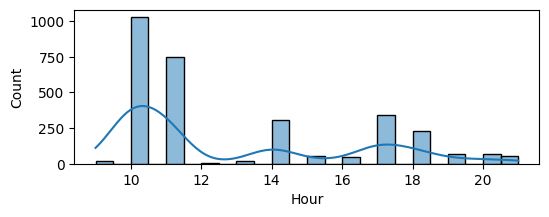

In [11]:
plt.figure(figsize=(6,2))
sns.histplot(data=df_general, x = 'Hour', bins = 24, kde = True)

In [12]:
# классифицируем ценность признаков
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=10)
result = selector.fit(df_general[['Year', 'Month', 'Day']], df_general['Hour'])
features_table = pd.DataFrame(result.feature_importances_, index = ['Year', 'Month', 'Day'], columns = ['importance'])
features_table.sort_values(by='importance', ascending=False)

,importance
Day,0.414666
Month,0.347817
Year,0.237516


**Вывод:** наибольшей ценностью, с точки зрения классификации пикового часа, обладают день и месяц предсказания. Наименьшей ценностью обладает год. Что вполне логично и предсказуемо

In [13]:
# оценим корреляцию значений в обучающей выборке
cm = sns.color_palette("vlag", as_cmap=True)

df_general.corr('pearson').style.background_gradient(cmap=cm, vmin = -1, vmax=1)

,Year,Month,Day,Hour
Year,1.000000,-0.033215,-0.001695,-0.011955
Month,-0.033215,1.000000,-0.041375,0.329808
Day,-0.001695,-0.041375,1.000000,-0.031674
Hour,-0.011955,0.329808,-0.031674,1.000000


**Вывод:** Отсутствует какая либо существенная корреляционная связь между значением пикового часа и каким-либо параметром (днём, месяцем или годом)

<Figure size 5000x5000 with 0 Axes>

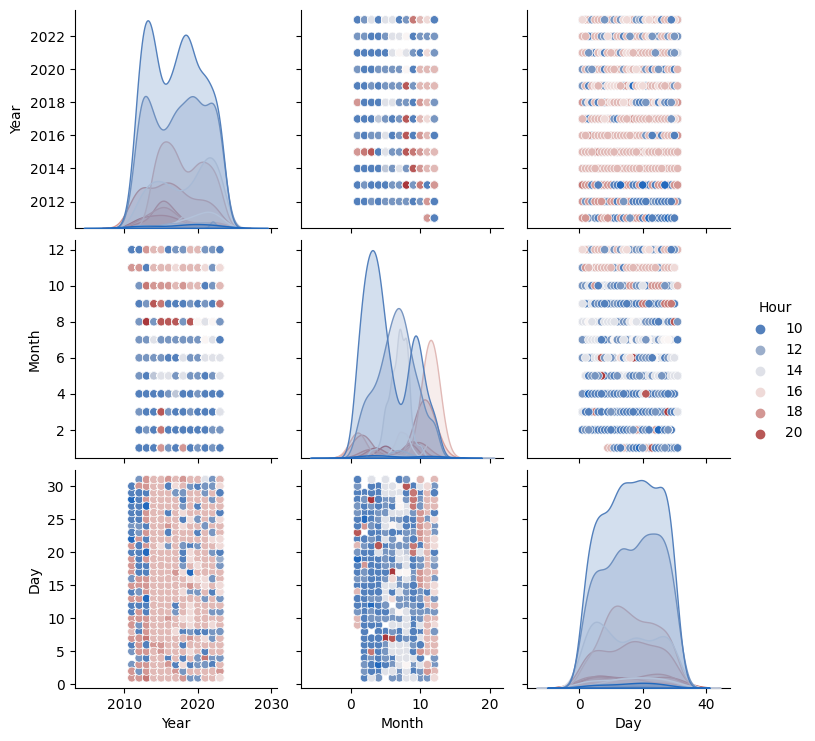

In [14]:
plt.figure(figsize=(50,50))
sns.pairplot(df_general, hue = 'Hour', palette = "vlag")
#plt.savefig('pairplot.png', dpi = 300, transparent = True)

**Вывод**: графики взаимосвязи исследуемых признаков говорят о классической задачи классификации

# Классификация деревьями

In [15]:
df_tree_train = df_train.copy()  # формируем обучающий датафрейм
df_tree_test = df_test.copy()  # формируем тестовый датафрейм

for date in range(len(date_list)):
    
    # инициализируем итоговый датафрейм с метриками качества при различных гиперпараметрах модели
    df_result = pd.DataFrame({'accuracy':[]})
    
    for i in range(2, 100):    
        model = tree.DecisionTreeClassifier(max_depth=i)  # обучаем модель
        model.fit(df_tree_train[date_list[date]], y=df_tree_train['Hour'])

        # предсказываем пиковый час
        df_tree_test[predicted_list[date]] = model.predict(df_tree_test[date_list[date]])
        
        # заполняем итоговый датафрейм долей верно классифицированных часов
        df_result.loc[i] = [accuracy_score(df_tree_test[predicted_list[date]], df_tree_test['Hour'])]
    
    print(message_list[date], f"{df_result.accuracy.max():.2%}", 'при глубине:', df_result.accuracy.idxmax())

    df_final = pd.concat([df_final, pd.DataFrame([{'method': 'DTC', 
                                                  'set': message_list[date],
                                                  'scaler': 'None', 
                                                  'depth': df_result.accuracy.idxmax().astype(int),
                                                  'accuracy': df_result.accuracy.max()}])], ignore_index=True)

full set 46.56% при глубине: 6
year + day 30.36% при глубине: 2
month + day 47.77% при глубине: 5
year + month 46.96% при глубине: 7


[Text(0.5, 0.8333333333333334, 'Month <= 10.5\ngini = 0.786\nsamples = 2746\nvalue = [19, 954, 681, 3, 22, 267, 47, 35, 318, 222, 65\n63, 50]\nclass = 10'),
 Text(0.25, 0.5, 'Month <= 4.5\ngini = 0.744\nsamples = 2238\nvalue = [12, 882, 630, 3, 22, 267, 47, 4, 61, 137, 60, 63\n50]\nclass = 10'),
 Text(0.125, 0.16666666666666666, 'gini = 0.61\nsamples = 843\nvalue = [8, 495, 155, 1, 3, 11, 2, 0, 54, 62, 24, 23, 5]\nclass = 10'),
 Text(0.375, 0.16666666666666666, 'gini = 0.767\nsamples = 1395\nvalue = [4, 387, 475, 2, 19, 256, 45, 4, 7, 75, 36, 40\n45]\nclass = 11'),
 Text(0.75, 0.5, 'Year <= 2013.5\ngini = 0.682\nsamples = 508\nvalue = [7, 72, 51, 0, 0, 0, 0, 31, 257, 85, 5, 0, 0]\nclass = 17'),
 Text(0.625, 0.16666666666666666, 'gini = 0.651\nsamples = 127\nvalue = [6, 41, 13, 0, 0, 0, 0, 0, 1, 61, 5, 0, 0]\nclass = 18'),
 Text(0.875, 0.16666666666666666, 'gini = 0.521\nsamples = 381\nvalue = [1, 31, 38, 0, 0, 0, 0, 31, 256, 24, 0, 0, 0]\nclass = 17')]

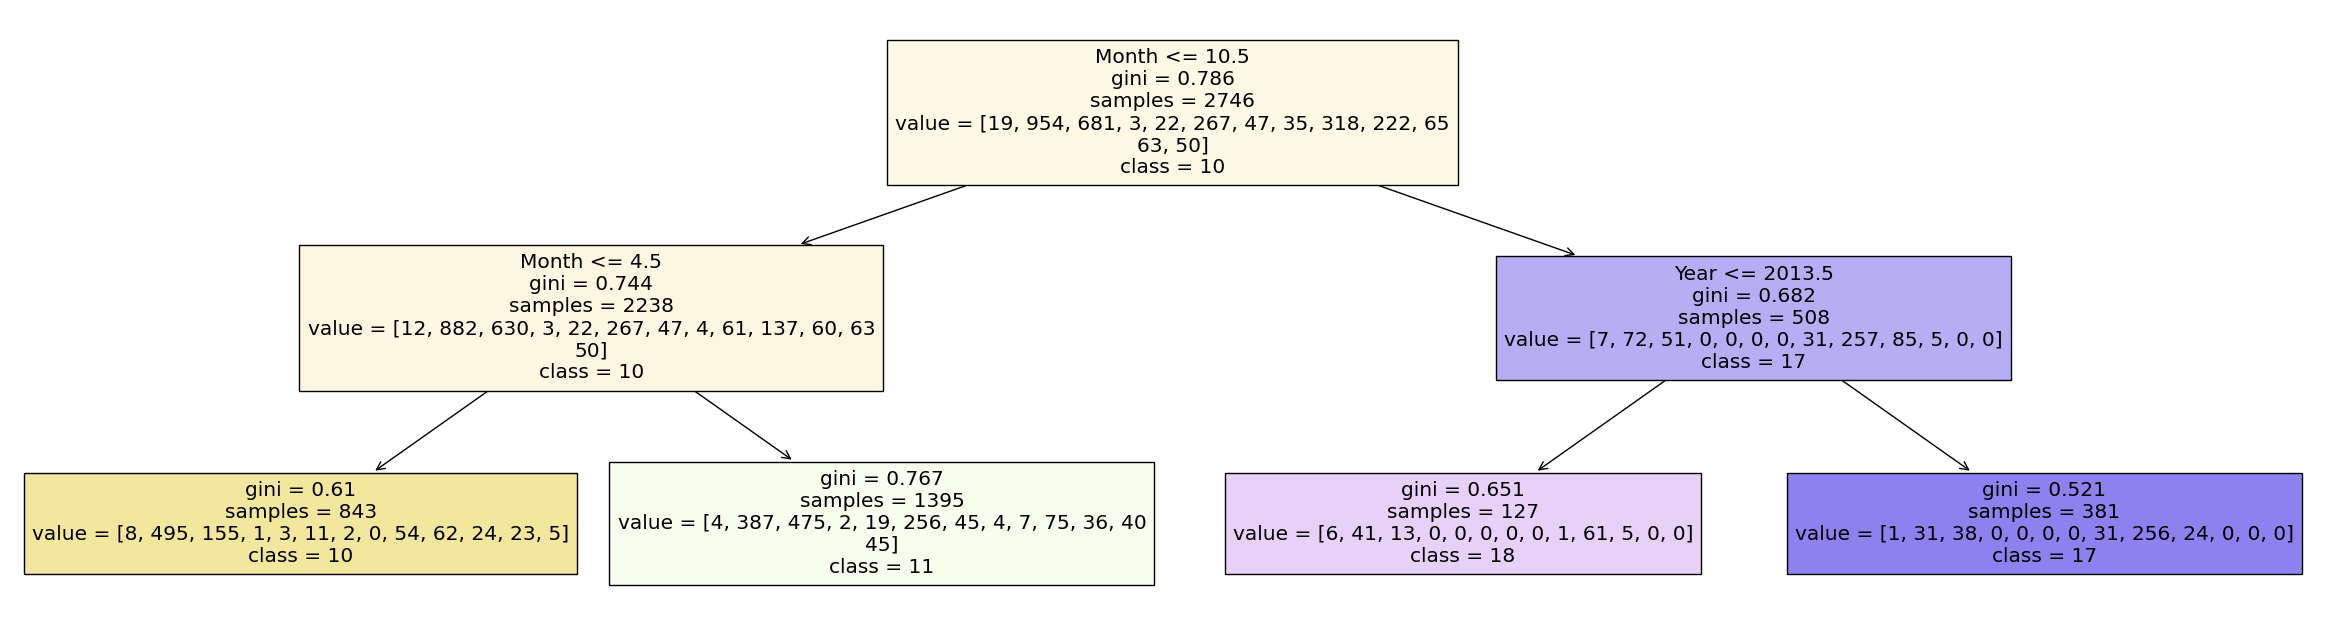

In [16]:
# Визуализируем дерево решений
model = tree.DecisionTreeClassifier(max_depth=2)
model.fit(df_tree_train[date_list[0]], y=df_tree_train['Hour'].values)

plt.style.use('default')
plt.figure(figsize=(30,8))

tree.plot_tree(model, 
               class_names=hours_list,
               feature_names=['Year', 'Month', 'Day'], filled=True)
#plt.savefig('tree.png', dpi = 400, transparent = True)

# Классификация бустингом

## Scikit

In [17]:
%%time

df_boost_train = df_train.copy()  # формируем обучающий датафрейм
df_boost_test = df_test.copy()  # формируем тестовый датафрейм

for date in trange(len(date_list), desc=f"date progress"):
    
    df_result = pd.DataFrame({'accuracy':[]})
    
    for i in range(2, 11):
    
        # обучаем модель
        model = GradientBoostingClassifier(max_depth=i)
        model.fit(df_boost_train[date_list[date]], y = df_boost_train['Hour'])

        # Предсказываем пиковый час
        df_boost_test[predicted_list[date]] = model.predict(df_boost_test[date_list[date]])
    
        # Заполняем итоговый датафрейм долей верно классифицированных часов
        df_result.loc[i] = [accuracy_score(df_boost_test[predicted_list[date]], df_boost_test['Hour'])]    

    # процент правильно классифицированных объектов
    print(message_list[date], f"{df_result.accuracy.max():.2%}", f'max_depth {df_result.accuracy.idxmax()}')
    
    df_final = pd.concat([df_final, pd.DataFrame([{'method': 'GradientBoosting', 
                                                  'set': message_list[date],
                                                  'scaler': 'None', 
                                                  'depth': df_result.accuracy.idxmax().astype(int),
                                                  'accuracy': df_result.accuracy.max()}])], ignore_index=True)
print()

date progress:   0%|          | 0/4 [00:00<?, ?it/s]

full set 44.94% max_depth 3
year + day 28.74% max_depth 2
month + day 49.80% max_depth 3
year + month 44.94% max_depth 5

CPU times: total: 2min 41s
Wall time: 2min 41s


## XGboost

In [18]:
%%time

df_boost_train = df_train.copy()  # формируем обучающий датафрейм
df_boost_test = df_test.copy()  # формируем тестовый датафрейм

# переводим числовые признаки в категориальные
df_boost_train = df_boost_train.replace(
    {'Hour':{i:hours_dict[i] for i in df_boost_train['Hour']}})

for date in trange(len(date_list), desc=f"date progress"):
    
    df_result = pd.DataFrame({'accuracy':[]})
    
    for i in range(2, 11):
    
        # обучаем модель
        model = xgb.XGBClassifier(max_depth=i, tree_method='gpu_hist')
        model.fit(df_boost_train[date_list[date]], y = df_boost_train['Hour'])

        # Предсказываем пиковый час
        df_boost_test[predicted_list[date]] = model.predict(df_boost_test[date_list[date]])

        # Возвращаем категориальные признаки в числовые
        df_boost_test = df_boost_test.replace(
            {predicted_list[date]:{i:int(hours_list[i]) for i in df_boost_test[predicted_list[date]]}})
        
        # Заполняем итоговый датафрейм долей верно классифицированных часов
        df_result.loc[i] = [accuracy_score(df_boost_test[predicted_list[date]], df_boost_test['Hour'])]
        

    # процент правильно классифицированных объектов        
    print(message_list[date], f"{df_result.accuracy.max():.2%}", f'max_depth {df_result.accuracy.idxmax()}')
    
    df_final = pd.concat([df_final, pd.DataFrame([{'method': 'XGBoost', 
                                                  'set': message_list[date],
                                                  'scaler': 'None', 
                                                  'depth': df_result.accuracy.idxmax().astype(int),
                                                  'accuracy': df_result.accuracy.max()}])], ignore_index=True)
print()

date progress:   0%|          | 0/4 [00:00<?, ?it/s]

full set 46.56% max_depth 2
year + day 27.53% max_depth 2
month + day 48.99% max_depth 3
year + month 44.94% max_depth 2

CPU times: total: 2min 6s
Wall time: 1min 24s


## CatBoost

In [19]:
%%time

df_boost_train = df_train.copy()  # формируем обучающий датафрейм
df_boost_test = df_test.copy()  # формируем тестовый датафрейм

for date in trange(len(date_list), desc=f"date progress"):    
    
    df_result = pd.DataFrame({'accuracy':[]})
    
    for i in range(2, 11): 
        
        # обучаем модель
        model = CatBoostClassifier(silent=True, max_depth=i)
        model.fit(df_boost_train[date_list[date]], y = df_boost_train['Hour'])

        # Предсказываем пиковый час
        df_boost_test[predicted_list[date]] = model.predict(df_boost_test[date_list[date]])
        
        # Заполняем итоговый датафрейм долей верно классифицированных часов
        df_result.loc[i] = [accuracy_score(df_boost_test[predicted_list[date]], df_boost_test['Hour'])]

    # процент правильно классифицированных объектов
    print(message_list[date], f"{df_result.accuracy.max():.2%}", f'max_depth {df_result.accuracy.idxmax()}')
    
    df_final = pd.concat([df_final, pd.DataFrame([{'method': 'CatBoost', 
                                                  'set': message_list[date],
                                                  'scaler': 'None', 
                                                  'depth': df_result.accuracy.idxmax().astype(int),
                                                  'accuracy': df_result.accuracy.max()}])], ignore_index=True)
print()

date progress:   0%|          | 0/4 [00:00<?, ?it/s]

full set 44.94% max_depth 2
year + day 27.13% max_depth 2
month + day 48.18% max_depth 3
year + month 44.94% max_depth 2

CPU times: total: 11min 17s
Wall time: 3min 9s


## AdaBoost

In [20]:
df_boost_train = df_train.copy()  # формируем обучающий датафрейм
df_boost_test = df_test.copy()  # формируем тестовый датафрейм

model = AdaBoostClassifier()

for date in range(len(date_list)):    
    
    # обучаем модель
    model.fit(df_boost_train[date_list[date]], y = df_boost_train['Hour'])
    
    # Предсказываем пиковый час
    df_boost_test[predicted_list[date]] = model.predict(df_boost_test[date_list[date]])
    
    # процент правильно классифицированных объектов
    print(message_list[date], f"{accuracy_score(df_boost_test[predicted_list[date]], df_boost_test['Hour']):.2%}")
    
    df_final = pd.concat([df_final, pd.DataFrame([{'method': 'AdaBoost', 
                                                  'set': message_list[date],
                                                  'scaler': 'None', 
                                                  'depth': 'None',
                                                  'accuracy': accuracy_score(df_boost_test[predicted_list[date]], df_boost_test['Hour'])}])], ignore_index=True)

full set 29.15%
year + day 29.15%
month + day 29.15%
year + month 29.15%


# Классификация методом опорных векторов

In [21]:
df_SVC_train = df_train.copy()  # формируем обучающий датафрейм
df_SVC_test = df_test.copy()  # формируем тестовый датафрейм
df_SVC_gen = pd.concat([df_SVC_train, df_SVC_test])  # формируем генеральную совокупность

# нормировка данных перед их использованием
scaler = MinMaxScaler()
scaler.fit(df_SVC_gen[date_list[0]])
arr_gen = scaler.transform(df_SVC_gen[date_list[0]])
arr_test = scaler.transform(df_SVC_test[date_list[0]])

# поиск лучших гиперпараметров SVC с помощью рандомизированного поиска
C_range = loguniform(1e-2, 1e2) 
gamma_range = loguniform(1e-2, 1e0)
tuned_parameters = [{'kernel': ['rbf'], 'gamma': gamma_range, 'C': C_range},
                    {'kernel': ['linear'], 'gamma': gamma_range, 'C': C_range}]

n_iter_search = 100
SVС_search = RandomizedSearchCV(estimator = SVC(coef0=0.5), verbose=0,
                          param_distributions=tuned_parameters,
                          cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42), 
                          n_iter = n_iter_search, random_state=42)

SVС_search.fit(arr_gen, df_SVC_gen['Hour'].values)

SVCbest = SVС_search.best_estimator_

SVCbest.fit(arr_gen, df_SVC_gen['Hour'].values);

# Предсказываем пиковый час
df_SVC_test['Predicted'] = SVCbest.predict(arr_test)

# процент правильно классифицированных объектов
print('Точность прогноза:', f"{accuracy_score(df_SVC_test['Predicted'], df_SVC_test['Hour']):.2%}")

df_final = pd.concat([df_final, pd.DataFrame([{'method': 'SVC', 
                                                  'set': message_list[0],
                                                  'scaler': 'MinMaxScaler', 
                                                  'depth': 'None',
                                                  'accuracy': accuracy_score(df_SVC_test['Predicted'], df_SVC_test['Hour'])}])], ignore_index=True)

Точность прогноза: 46.15%


In [22]:
SVC_gp = SVCbest.get_params() #  передача оптимальных гиперпараметров модели в объект типа Dict
SVCbest

SVC(C=77.06343825607371, coef0=0.5, gamma=0.4986865424754635)

# Ансамбль методов

## Random Forest

In [23]:
df_ensemble_train = df_train.copy()  # формируем обучающий датафрейм
df_ensemble_test = df_test.copy()  # формируем тестовый датафрейм

for date in range(len(date_list)):
    
    # инициализируем итоговый датафрейм с метриками качества при различных гиперпараметрах модели
    df_result = pd.DataFrame({'accuracy':[]})
    
    for i in range(2, 20):    
        model = RandomForestClassifier(max_depth=i, random_state=10)  # обучаем модель
        model.fit(df_ensemble_train[date_list[date]], y=df_ensemble_train['Hour'])

        # предсказываем пиковый час
        df_ensemble_test[predicted_list[date]] = model.predict(df_ensemble_test[date_list[date]])
        
        # заполняем итоговый датафрейм долей верно классифицированных часов
        df_result.loc[i] = [accuracy_score(df_ensemble_test[predicted_list[date]], df_ensemble_test['Hour'])]
    
    print(message_list[date], f"{df_result.accuracy.max():.2%}", 'при глубине:', df_result.accuracy.idxmax())
    
    df_final = pd.concat([df_final, pd.DataFrame([{'method': 'RandomForest', 
                                                  'set': message_list[date],
                                                  'scaler': 'None', 
                                                  'depth': df_result.accuracy.idxmax(),
                                                  'accuracy': df_result.accuracy.max()}])], ignore_index=True)    

full set 48.58% при глубине: 6
year + day 30.36% при глубине: 2
month + day 47.77% при глубине: 7
year + month 48.18% при глубине: 6


## Bagging

### Bagging (DecisionTreeClassifier)

In [24]:
df_ensemble_train = df_train.copy()  # формируем обучающий датафрейм
df_ensemble_test = df_test.copy()  # формируем тестовый датафрейм

for date in range(len(date_list)):
    
    # инициализируем итоговый датафрейм с метриками качества при различных гиперпараметрах модели
    df_result = pd.DataFrame({'accuracy':[]})
    
    for i in range(2, 100):    
        model = BaggingClassifier(n_estimators=i, bootstrap=True, random_state=102)  # обучаем модель
        model.fit(df_ensemble_train[date_list[date]], y=df_ensemble_train['Hour'])

        # предсказываем пиковый час
        df_ensemble_test[predicted_list[date]] = model.predict(df_ensemble_test[date_list[date]])
        
        # заполняем итоговый датафрейм долей верно классифицированных часов
        df_result.loc[i] = [accuracy_score(df_ensemble_test[predicted_list[date]], df_ensemble_test['Hour'])]
    
    print(message_list[date], f"{df_result.accuracy.max():.2%}", 'n_estimators ', df_result.accuracy.idxmax())
    
    df_final = pd.concat([df_final, pd.DataFrame([{'method': 'Bagging(DTC)', 
                                                  'set': message_list[date],
                                                  'scaler': 'None', 
                                                  'depth': df_result.accuracy.idxmax(),
                                                  'accuracy': df_result.accuracy.max()}])], ignore_index=True)     

full set 36.44% n_estimators  4
year + day 26.72% n_estimators  60
month + day 45.75% n_estimators  50
year + month 44.13% n_estimators  2


### Bagging (Support Vector Method)

#### Дефолтные гиперпараметры

In [25]:
df_ensemble_train = df_train.copy()  # формируем обучающий датафрейм
df_ensemble_test = df_test.copy()  # формируем тестовый датафрейм

for date in range(len(date_list)):
    
    # инициализируем итоговый датафрейм с метриками качества при различных гиперпараметрах модели
    df_result = pd.DataFrame({'accuracy':[]})
    
    for i in range(2, 10):    
        model = BaggingClassifier(base_estimator=SVC(), 
                                  n_estimators=i, bootstrap=True, random_state=42)  # обучаем модель
        model.fit(df_ensemble_train[date_list[date]], y=df_ensemble_train['Hour'])

        # предсказываем пиковый час
        df_ensemble_test[predicted_list[date]] = model.predict(df_ensemble_test[date_list[date]])
        
        # заполняем итоговый датафрейм долей верно классифицированных часов
        df_result.loc[i] = [accuracy_score(df_ensemble_test[predicted_list[date]], df_ensemble_test['Hour'])]
    
    print(message_list[date], f"{df_result.accuracy.max():.2%}", 'n_estimators ', df_result.accuracy.idxmax())
    
    df_final = pd.concat([df_final, pd.DataFrame([{'method': 'Bagging(SVC)', 
                                                  'set': message_list[date],
                                                  'scaler': 'None', 
                                                  'depth': df_result.accuracy.idxmax(),
                                                  'accuracy': df_result.accuracy.max()}])], ignore_index=True)     

full set 30.36% n_estimators  2
year + day 30.36% n_estimators  2
month + day 38.46% n_estimators  3
year + month 30.36% n_estimators  2


#### Гиперпараметры из п. 5

In [26]:
df_ensemble_train = df_train.copy()  # формируем обучающий датафрейм
df_ensemble_test = df_test.copy()  # формируем тестовый датафрейм

for date in range(len(date_list)):
    
    # инициализируем итоговый датафрейм с метриками качества при различных гиперпараметрах модели
    df_result = pd.DataFrame({'accuracy':[]})
    
    for i in range(2, 10):    
        model = BaggingClassifier(base_estimator=SVC(C = SVC_gp['C'], 
                                                     break_ties=SVC_gp['break_ties'], 
                                                     cache_size=SVC_gp['cache_size'], 
                                                     class_weight=SVC_gp['class_weight'],
                                                     coef0=SVC_gp['coef0'],
                                                     decision_function_shape=SVC_gp['decision_function_shape'],
                                                     degree=SVC_gp['degree'],
                                                     gamma=SVC_gp['gamma'],
                                                     kernel=SVC_gp['kernel'],
                                                     max_iter=SVC_gp['max_iter'],
                                                     probability=SVC_gp['probability'],
                                                     random_state=SVC_gp['random_state'],
                                                     shrinking=SVC_gp['shrinking'],
                                                     tol=SVC_gp['tol'],
                                                     verbose=SVC_gp['verbose']), 
                                  n_estimators=i, bootstrap=True, random_state=42)  # обучаем модель
        model.fit(df_ensemble_train[date_list[date]], y=df_ensemble_train['Hour'])

        # предсказываем пиковый час
        df_ensemble_test[predicted_list[date]] = model.predict(df_ensemble_test[date_list[date]])
        
        # заполняем итоговый датафрейм долей верно классифицированных часов
        df_result.loc[i] = [accuracy_score(df_ensemble_test[predicted_list[date]], df_ensemble_test['Hour'])]
    
    print(message_list[date], f"{df_result.accuracy.max():.2%}", 'n_estimators ', df_result.accuracy.idxmax())
    
    df_final = pd.concat([df_final, pd.DataFrame([{'method': 'Bagging(SVC)', 
                                                  'set': message_list[date],
                                                  'scaler': 'RandomSearchCV', 
                                                  'depth': df_result.accuracy.idxmax(),
                                                  'accuracy': df_result.accuracy.max()}])], ignore_index=True)     

full set 33.20% n_estimators  5
year + day 27.13% n_estimators  6
month + day 45.34% n_estimators  6
year + month 44.94% n_estimators  4


# Метод K-ближайших соседей

In [27]:
df_k_train = df_train.copy()  # формируем обучающий датафрейм
df_k_test = df_test.copy()  # формируем тестовый датафрейм

for weights in ['uniform', 'distance']: # выбор типа весов

    print('Однородные веса' if weights == 'uniform' else '\nНеоднородные веса')

    for scaler in scaler_list:

        print("\033[30m\033[32m{}\033[0m".format(scaler))    

        for date in range(len(date_list)):

            # инициализируем итоговый датафрейм с метриками качества при различных гиперпараметрах модели
            df_result = pd.DataFrame({'accuracy':[]})

            # нормировка/стандартизация данных перед их использованием
            scaler.fit(df_k_train[date_list[date]])
            X_train = scaler.transform(df_k_train[date_list[date]])
            X_test = scaler.transform(df_k_test[date_list[date]])

            for i in range(2, 100):    
                neighbors = KNeighborsClassifier(n_neighbors=i, weights = weights)  # обучаем модель
                neighbors.fit(X_train, y=df_k_train['Hour'])

                # предсказываем пиковый час
                df_k_test[predicted_list[date]] = neighbors.predict(X_test)

                # заполняем итоговый датафрейм долей верно классифицированных часов
                df_result.loc[i] = [accuracy_score(df_k_test[predicted_list[date]], df_k_test['Hour'])]

            print(message_list[date], f"{df_result.accuracy.max():.2%}", 
                  'n_neighbors', df_result.accuracy.idxmax())
            
            df_final = pd.concat([df_final, pd.DataFrame([{'method': f"KNeighbors: {weights}", 
                                                  'set': message_list[date],
                                                  'scaler': scaler, 
                                                  'depth': df_result.accuracy.idxmax(),
                                                  'accuracy': df_result.accuracy.max()}])], ignore_index=True)  

Однородные веса
StandardScaler()
full set 46.56% n_neighbors 35
year + day 34.41% n_neighbors 30
month + day 48.99% n_neighbors 25
year + month 48.18% n_neighbors 83
MinMaxScaler()
full set 46.56% n_neighbors 32
year + day 34.01% n_neighbors 34
month + day 49.80% n_neighbors 62
year + month 48.18% n_neighbors 81

Неоднородные веса
StandardScaler()
full set 46.56% n_neighbors 29
year + day 34.01% n_neighbors 36
month + day 44.13% n_neighbors 8
year + month 48.18% n_neighbors 88
MinMaxScaler()
full set 47.37% n_neighbors 32
year + day 34.01% n_neighbors 34
month + day 44.13% n_neighbors 7
year + month 48.18% n_neighbors 79


In [29]:
# самый эффективный метод
df_final = df_final.sort_values(by='accuracy', ascending=False)
df_final.reset_index(drop=True, inplace=True)
df_final.style.highlight_max(color='yellowgreen', subset='accuracy')  # таблица с итоговым отсортированным результатом

,method,set,scaler,depth,accuracy
0,KNeighbors: uniform,month + day,MinMaxScaler(),62,0.497976
1,GradientBoosting,month + day,None,3.000000,0.497976
2,KNeighbors: uniform,month + day,StandardScaler(),25,0.489879
3,XGBoost,month + day,None,3.000000,0.489879
4,RandomForest,full set,None,6,0.485830
5,RandomForest,year + month,None,6,0.481781
6,CatBoost,month + day,None,3.000000,0.481781
7,KNeighbors: uniform,year + month,StandardScaler(),83,0.481781
8,KNeighbors: distance,year + month,MinMaxScaler(),79,0.481781
9,KNeighbors: uniform,year + month,MinMaxScaler(),81,0.481781


In [32]:
# Оптимальный тип весов для KNeighbors
df_final_KN = pd.concat([df_final[df_final['method']==('KNeighbors: uniform')], 
                        df_final[df_final['method']==('KNeighbors: distance')]], ignore_index=True)

df_final_KN[df_final_KN['method']=='KNeighbors: uniform'].loc[df_final_KN.accuracy.idxmax():df_final_KN.accuracy.idxmax()+1].style.highlight_max(color='yellowgreen', subset='method')

,method,set,scaler,depth,accuracy
0,KNeighbors: uniform,month + day,MinMaxScaler(),62,0.497976
1,KNeighbors: uniform,month + day,StandardScaler(),25,0.489879
